In [40]:
#Importing the required libraries for our task

import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
from sklearn.metrics import davies_bouldin_score
import time

In [41]:
#Importing data from local drive

data_sales = pd.read_csv(r"D:\college\sem2\Data Mining and Machine learning\Assignment 2\Sales_Transactions_Dataset_Weekly.csv");
data_live = pd.read_csv(r"D:\college\sem2\Data Mining and Machine learning\Assignment 2\live.csv")
data_water = pd.read_csv(r"D:\college\sem2\Data Mining and Machine learning\Assignment 2\water-treatment.csv")
data_jones = pd.read_csv(r"D:\college\sem2\Data Mining and Machine learning\Assignment 2\dow_jones_index\dow_jones_index.csv")

In [42]:
#Randomly choosing 5 records of any data set to ensure that data has been read properly

#Top 5 records display to ensure sales-transaction data is read properly

data_sales.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [43]:
#Data Pre-processing and cleaning

#Dropping column in Sales-Transaction Data
data_sales=data_sales.drop(columns='Product_Code')

In [44]:
#Cleaning for data set water. Filling na values with mean

data_water=data_water.drop(columns='title')
data_water.head()
data_water.iloc[:,0]

nrow,ncol = data_water.shape
print(ncol)

for i in range(ncol):
    data_water.iloc[:,i] = data_water.iloc[:,i].fillna(data_water.iloc[:,i].mean())

38


In [45]:
#Cleaning for data set facebook Live.Dropping columns

data_live=data_live.drop(columns='Column1')
data_live=data_live.drop(columns='Column2')
data_live=data_live.drop(columns='Column3')
data_live=data_live.drop(columns='Column4')

data_live=data_live.drop(columns='status_published')
data_live=data_live.drop(columns='status_id')
data_live=data_live.drop(columns='status_type')

In [46]:
#Cleaning data for data set dow_jones. Filling null values and label encoding non numeric data.

data_jones.percent_change_volume_over_last_wk = data_jones.percent_change_volume_over_last_wk.fillna(data_jones.percent_change_volume_over_last_wk.mean())
data_jones.previous_weeks_volume = data_jones.previous_weeks_volume.fillna(data_jones.previous_weeks_volume.mean())
data_jones[data_jones.columns[3:7]] = data_jones[data_jones.columns[3:7]].replace('[\$,]', '', regex=True).astype(float)
data_jones[data_jones.columns[11:13]] = data_jones[data_jones.columns[11:13]].replace('[\$,]', '', regex=True).astype(float)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_jones['stock']= label_encoder.fit_transform(data_jones['stock'])
print(data_jones['stock'].unique())

data_jones=data_jones.drop(columns='date')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 16 18 19 20 21 22 23
 24 25 26 27 28 29]


In [47]:
#pre-processing data now. 
#Implementing Standard Scaler for scaling data and PCA for Dimensionality reduction

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Standard Scaler for dow_jones
scale = StandardScaler()
scale.fit(data_jones)
scaled_data = scale.fit_transform(data_jones)


#PCA for dow_jones
pca = PCA(n_components=2)
pca2=PCA(n_components=2)
pca_data_jones = pca.fit_transform(scaled_data)

pca_data_jones2 = pca2.fit_transform(scaled_data)

In [48]:
#Pre-processing for sales transaction dataset

#Scaling for sales data
scale = StandardScaler()
scale.fit(data_sales)
scaled_data = scale.fit_transform(data_sales)
#PCA for sales data
pca = PCA(n_components=2)
pca_data_sales = pca.fit_transform(scaled_data)
pca2=PCA(n_components=2)
pca_data_sales2 = pca2.fit_transform(scaled_data)


In [49]:
#Pre-processing for water dataset

#Standard Scaler for water dataset
scale = StandardScaler()
scale.fit(data_sales)
scaled_data = scale.fit_transform(data_water)

#PCA for water dataset
pca = PCA(n_components=2)
pca_data_water = pca.fit_transform(scaled_data)
pca2=PCA(n_components=2)
pca_data_water2 = pca2.fit_transform(scaled_data)

In [61]:
#Pre-processing for facebook live data set

#Standard Scaler for facebook live dataset
scale = StandardScaler()
scale.fit(data_sales)
scaled_data = scale.fit_transform(data_live)


#PCA for facebook live data set
pca = PCA(n_components=2)
pca_data_live = pca.fit_transform(scaled_data)
pca2=PCA(n_components=2)
pca_data_live2 = pca2.fit_transform(scaled_data)


In [62]:
#Declaring functions for cluster center calculation and SSE calculation.

from sklearn.cluster import KMeans
list_of_dataset=[pca_data_jones,pca_data_live,pca_data_sales,pca_data_water]
list_of_dataset2=[pca_data_jones2,pca_data_live2,pca_data_sales2,pca_data_water2]
names_data_set=["Dow Jones dataset","Facebook Live dataset","Sales and Transactions Dataset","Water Treatment Dataset"]
optm_num_k=[]
optm_eps=[]
optm_num_n=[]

def calClusterCenters(data_set_sample,data_set_labels):
    clustcord=[]
    clus_list=[]
    for i in range(len(data_set_sample)):
        if(data_set_labels[i] not in clus_list):
            clus_list.append(data_set_labels[i])
    for i in clus_list:
        subclus=[]
        x_cord=sum(data_set_sample[data_set_labels==i,0])
        y_cord=sum(data_set_sample[data_set_labels==i,1])
        count=0
        for j in range(len(data_set_sample)):
            if(data_set_labels[j]==i):
                count+=1
        clustcord.append([x_cord/count,y_cord/count,i])
    return clustcord

def sumSquareError(data_set_sample,data_set_labels):
    sse=0
    data_set_centroids=calClusterCenters(data_set_sample,data_set_labels)
    for i in range(len(data_set_sample)):
        k=0
        for j in range(len(data_set_centroids)):
            if(data_set_centroids[j][2]==data_set_labels[i]):
                k=j
        x_dist=data_set_centroids[k][0]-data_set_sample[i,0]
        y_dist=data_set_centroids[k][1]-data_set_sample[i,1]
        total_dist=(x_dist*x_dist+y_dist*y_dist)
        sse+=total_dist
    return sse

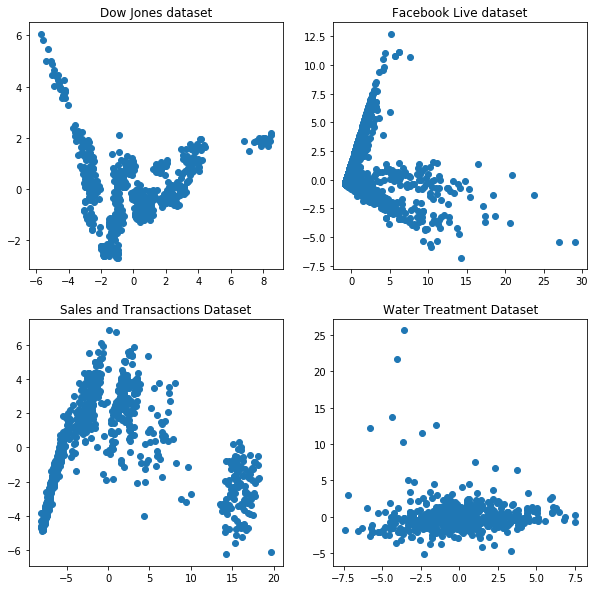

In [63]:
#Scatter plot for each data set to understand cluster pattern. 

fig,ay=plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]

for i, data_set in enumerate(list_of_dataset):
    ax[i].scatter(data_set[i:,0], data_set[i:,1])
    ax[i].set_title(names_data_set[i])

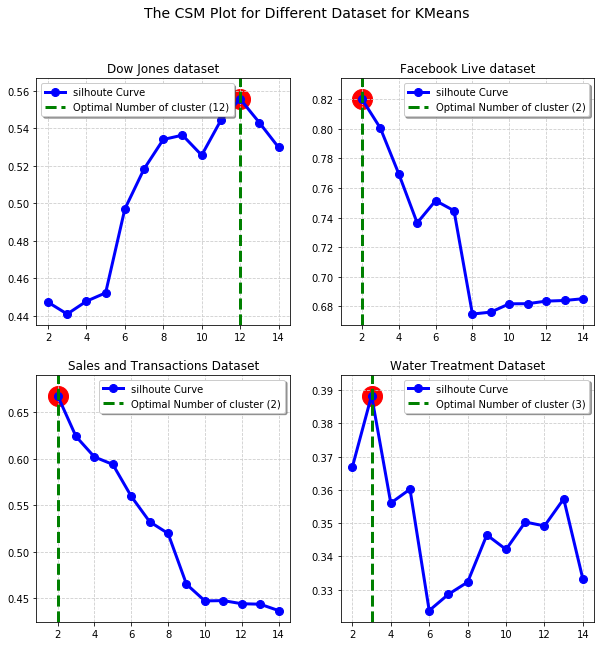

In [64]:
#CSM analysis for finding optimum number of clusters in each dataset.

fig,ay=plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]
for i, data_set in enumerate(list_of_dataset):
    k_means_per_k = [KMeans(n_clusters=k).fit(data_set) for k in range(2,15)]
# print(k_means_per_k)
    silhoute_scores_per_k = [silhouette_score(data_set,model.labels_) for model in k_means_per_k[0:]]
#     print(silhoute_scores_per_k)


    ax[i].plot(range(2,15),silhoute_scores_per_k,'bo-',color='blue',linewidth=3,markersize=8,label='silhoute Curve')
    ax[i].grid(which='major',color='#cccccc',linestyle='--')
    k=silhoute_scores_per_k.index(max(silhoute_scores_per_k))
    num_opt_clus=k+2
    optm_num_k.append(num_opt_clus)
    ax[i].axvline(x=k+2, linestyle='--', c='green',linewidth=3,label='Optimal Number of cluster ({})'.format(k+2))
    ax[i].scatter(k+2, silhoute_scores_per_k[k],c='red',s=400)
    ax[i].legend(shadow=True)
    ax[i].set_title(names_data_set[i])
fig.suptitle("The CSM Plot for Different Dataset for KMeans", fontsize=14) 
_ = plt.show()

Result table

Data Set                          Silhoute Score    SSE Score    Davies Score    Time Taken
------------------------------  ----------------  -----------  --------------  ------------
Dow Jones dataset                       0.553142      191.077        0.522847     0.0548179
Facebook Live dataset                   0.819889    21512.3          0.596296     0.0568478
Sales and Transactions Dataset          0.667889    17351.6          0.442714     0.0568297
Water Treatment Dataset                 0.388325     2736.43         0.767741     0.0308874


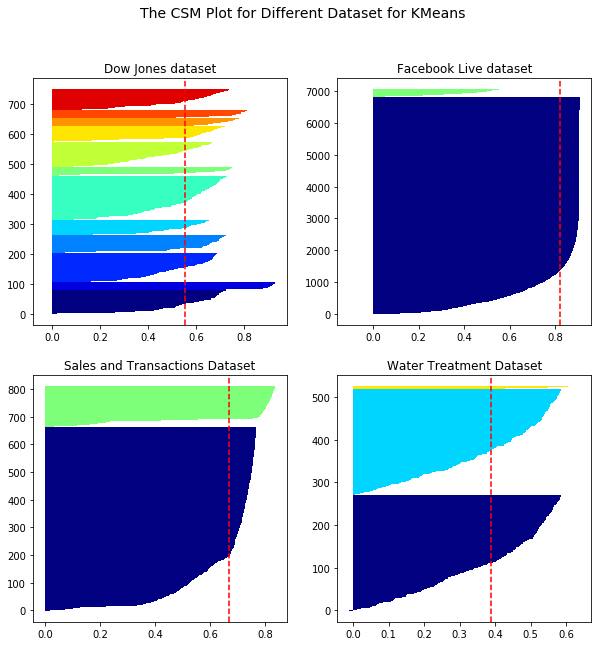

In [65]:
#Implementing K-Means on four data sets. Calculating SSE score, Silhoute Score, Davies Bouldin Score and Time Taken

from matplotlib import cm
from tabulate import tabulate
km_table_list=[]
fig, ay = plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]
for i, data_set in enumerate(list_of_dataset):
    km_data_set = KMeans(n_clusters=optm_num_k[i])
    start_time_km = time.time()
    kmfit_data_set=km_data_set.fit(data_set)
    end_time_km = time.time()
    kmfitpred_data_set = km_data_set.fit_predict(data_set)
    sum_sqr_er = kmfit_data_set.inertia_
    davies_score = davies_bouldin_score(data_set,kmfit_data_set.labels_)
    dataset_silhoute_score = silhouette_score(data_set,kmfit_data_set.labels_)
    time_taken_km = end_time_km - start_time_km
    list_table = [names_data_set[i],dataset_silhoute_score,sumSquareError(data_set,kmfit_data_set.labels_),davies_score,time_taken_km]
    km_table_list.append(list_table)
    
    cluster_labels = np.unique(kmfitpred_data_set)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data_set, kmfitpred_data_set, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for x, c in enumerate(cluster_labels):
     c_silhouette_vals = silhouette_vals[kmfitpred_data_set == c]
     c_silhouette_vals.sort()
     y_ax_upper += len(c_silhouette_vals)
     color = cm.jet(float(x) / n_clusters)
     ax[i].barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

     yticks.append((y_ax_lower + y_ax_upper) / 2.)
     y_ax_lower += len(c_silhouette_vals)
     silhouette_avg = np.mean(silhouette_vals)
    ax[i].axvline(silhouette_avg, color="red", linestyle="--")
    ax[i].set_title(names_data_set[i])
    
fig.suptitle("The CSM Plot for Different Dataset for KMeans", fontsize=14)    
print('Result table\n')
print(tabulate(km_table_list,headers=['Data Set','Silhoute Score','SSE Score','Davies Score','Time Taken']))

Optimal eps for DBSCAN is: 0.77
Optimal eps for DBSCAN is: 0.77
Optimal eps for DBSCAN is: 0.8
Optimal eps for DBSCAN is: 0.5700000000000001


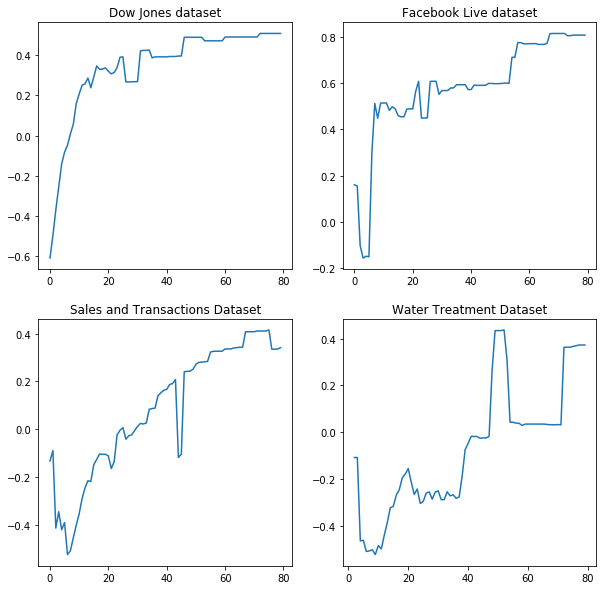

In [66]:
#Calculating the optimal number of eps value in DBSCAN for each dataset
from sklearn.cluster import DBSCAN
from sklearn import metrics
fig, ay = plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]
for i,data_set in enumerate(list_of_dataset2):
    start= 0.0
    stop= 1.0
    step = 0.01
    my_list = np.arange(start, stop+step, step)
# print(my_list)
    sildbscan=[]
    plter=[]
    max_eps=0.1
    max_silscore=0
    for j in range(80):
        db = DBSCAN(eps=.05+my_list[j],min_samples=4)
        data_dbscan = db.fit(data_set)
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        if(n_clusters_>0):
            sil_score=metrics.silhouette_score(data_set,labels)
            sildbscan.append(sil_score)
            plter.append(j)
            if(sil_score>max_silscore):
                max_silscore=sil_score
                max_eps=0.05+my_list[j]

    print("Optimal eps for DBSCAN is:",max_eps)
    optm_eps.append(max_eps)
    ax[i].plot(plter,sildbscan)
    ax[i].set_title(names_data_set[i])
plt.show()

Result table

Data Set                          Silhoutte Score    Sum Squared Error    Davies Score    Time Taken
------------------------------  -----------------  -------------------  --------------  ------------
Dow Jones dataset                        0.507938              3650.18         0.37703    0.00498748
Facebook Live dataset                    0.816399             24514.2          4.27344    0.407367
Sales and Transactions Dataset           0.415743              8783.58         4.31247    0.00397635
Water Treatment Dataset                  0.436666              6280.76         3.35608    0.00199175


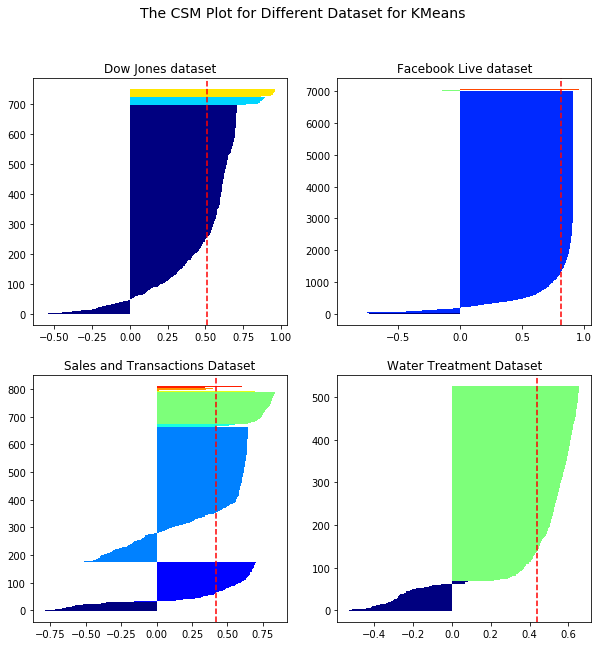

In [67]:
#Implementing DBSCAN on four datasets for calculating SSE score, SIlhoute score, Davies Bouldin and Time taken for each data set.

from sklearn.cluster import DBSCAN
db_table_list =[]
fig, ay = plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]
for i,data_set in enumerate(list_of_dataset2):
    dbscan_data_set = DBSCAN(eps=optm_eps[i],min_samples=4)
    start_time_db = time.time()
    dbsfit_dataset = dbscan_data_set.fit(data_set)
    end_time_db = time.time()
    dbsfit_pred_dataset = dbscan_data_set.fit_predict(data_set)
    try:
     dataset_silhote_score = silhouette_score(data_set,dbsfit_dataset.labels_)
     davies_score = davies_bouldin_score(data_set,dbsfit_dataset.labels_)
     time_taken_db = end_time_db-start_time_db
     db_list_tabl = [names_data_set[i],dataset_silhote_score,sumSquareError(data_set,dbsfit_dataset.labels_),davies_score,time_taken_db]
     db_table_list.append(db_list_tabl)
    
     cluster_labels = np.unique(dbsfit_pred_dataset)
     n_clusters = cluster_labels.shape[0]
     silhouette_vals = silhouette_samples(data_set, dbsfit_pred_dataset, metric='euclidean')
     y_ax_lower, y_ax_upper = 0, 0
     yticks = []
     for x, c in enumerate(cluster_labels):
      c_silhouette_vals = silhouette_vals[dbsfit_pred_dataset == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(float(x) / n_clusters)
      ax[i].barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

      yticks.append((y_ax_lower + y_ax_upper) / 2.)
      y_ax_lower += len(c_silhouette_vals)
     silhouette_avg = np.mean(silhouette_vals)
     ax[i].axvline(silhouette_avg, color="red", linestyle="--")
     ax[i].set_title(names_data_set[i])
    except: 
        print(names_data_set[i])
fig.suptitle("The CSM Plot for Different Dataset for KMeans", fontsize=14)
print('Result table\n')
print(tabulate(db_table_list,headers=['Data Set','Silhoutte Score','Sum Squared Error','Davies Score','Time Taken']))


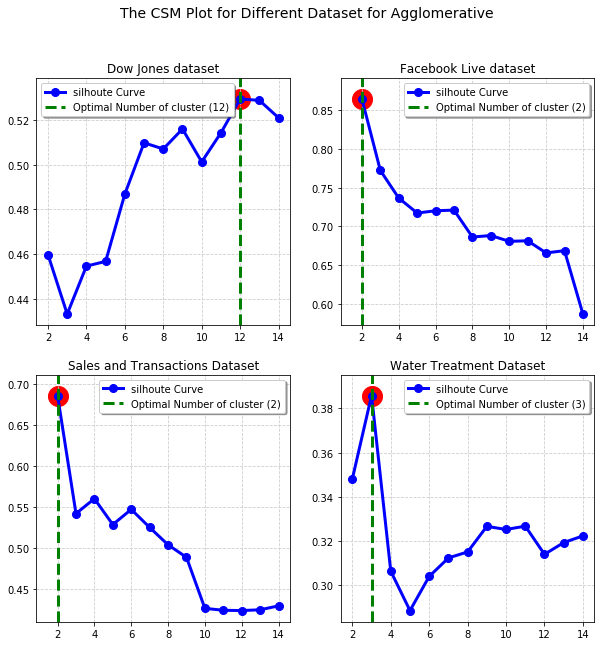

In [68]:
#Implementing agglomerative algorithm for finding optimal number of clusters for each data set. 

from sklearn.cluster import AgglomerativeClustering
fig,ay=plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]
for i, data_set in enumerate(list_of_dataset):
    k_means_per_k = [AgglomerativeClustering(n_clusters=k).fit(data_set) for k in range(2,15)]
# print(k_means_per_k)
    silhoute_scores_per_k = [silhouette_score(data_set,model.labels_) for model in k_means_per_k[0:]]
#     print(silhoute_scores_per_k)


    ax[i].plot(range(2,15),silhoute_scores_per_k,'bo-',color='blue',linewidth=3,markersize=8,label='silhoute Curve')
    ax[i].grid(which='major',color='#cccccc',linestyle='--')
    k=silhoute_scores_per_k.index(max(silhoute_scores_per_k))
    num_opt_clus=k+2
    optm_num_n.append(num_opt_clus)
    ax[i].axvline(x=k+2, linestyle='--', c='green',linewidth=3,label='Optimal Number of cluster ({})'.format(k+2))
    ax[i].scatter(k+2, silhoute_scores_per_k[k],c='red',s=400)
    ax[i].legend(shadow=True)
    ax[i].set_title(names_data_set[i])
fig.suptitle("The CSM Plot for Different Dataset for Agglomerative", fontsize=14) 
_ = plt.show()

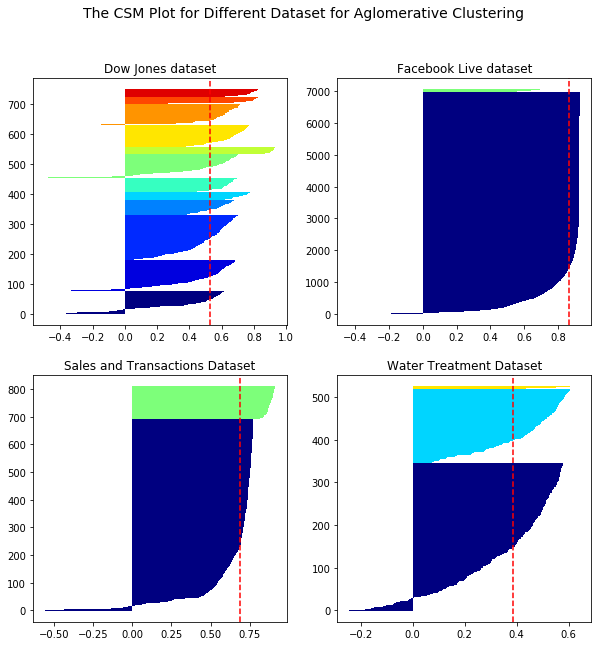

The results for Agglomerative Clustering are as follows:-
Data Set                          Silhouette Score    Sum of Square Error    Davies Score    Time Taken
------------------------------  ------------------  ---------------------  --------------  ------------
Dow Jones dataset                         0.529185                217.156        0.543915    0.0109859
Facebook Live dataset                     0.864207              23487.7          0.391833    1.2658
Sales and Transactions Dataset            0.68561               18308.1          0.335554    0.0129478
Water Treatment Dataset                   0.385839               2863.67         0.760786    0.00601912


In [69]:
#Implementing Agglomerative Technique for calculating SSE Score, Silhoutte Score, Davis Bouldin Score and time taken for each dataset
from sklearn.cluster import AgglomerativeClustering
tablelistac=[]
fig, ay = plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]
for i,data_set in enumerate(list_of_dataset):
    data_set_ac=AgglomerativeClustering(optm_num_n[i])
    ac_stime=time.time()
    data_acfit=data_set_ac.fit(data_set)
    ac_etime=time.time()
    data_acfp=data_set_ac.fit_predict(data_set)
    silhoute_score_dataset = silhouette_score(data_set, data_acfit.labels_)
    davies_score = davies_bouldin_score(data_set,data_acfit.labels_)
    data_ac_ttime=ac_etime-ac_stime
    tablist=[names_data_set[i],silhoute_score_dataset,sumSquareError(data_set,data_acfit.labels_),davies_score,data_ac_ttime]
    tablelistac.append(tablist)
    
    cluster_labels = np.unique(data_acfp)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data_set, data_acfp, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for x, c in enumerate(cluster_labels):
     c_silhouette_vals = silhouette_vals[data_acfp == c]
     c_silhouette_vals.sort()
     y_ax_upper += len(c_silhouette_vals)
     color = cm.jet(float(x) / n_clusters)
     ax[i].barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

     yticks.append((y_ax_lower + y_ax_upper) / 2.)
     y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    ax[i].axvline(silhouette_avg, color="red", linestyle="--")
    ax[i].set_title(names_data_set[i])
fig.suptitle("The CSM Plot for Different Dataset for Aglomerative Clustering", fontsize=14)  
plt.show()
print("The results for Agglomerative Clustering are as follows:-")
print(tabulate(tablelistac, headers=['Data Set','Silhouette Score','Sum of Square Error','Davies Score','Time Taken']))  

In [70]:
#Best Clustering Algorithm on our datasets based on Rank score.
#This is applicable only if Silhoutte Score and Davies Boulding are similar and unable to differentiate the best performance
# The measure taken are Silhoutte Score and Time taken by each clustering algorithm for clustering
# Rank = Silhoutte Score/time taken

def getScore(tablist):
    rank_scores=[]
    tabulate_new_list =[]
    slhoute_avg =0
    sum_sqr_avg =0
    time_avg =0
    dbs_avg=0
    rank_score_avg =0
    for data_set in tablist:
        tab=[]
        
        tab.append(data_set[0])
        slhoute_avg+=data_set[1]
        
        tab.append(data_set[1])
        sum_sqr_avg+=(data_set[2])
        
        tab.append(data_set[2])
        time_avg+=data_set[3]
        
        tab.append(data_set[3])
        dbs_avg+=data_set[4]
        
        tab.append(data_set[4])
        score = (data_set[1]/data_set[3])
        
        rank_score_avg+=score
        tab.append(score)
        
        tabulate_new_list.append(tab)

    tabulate_new_list.append(['Avg Score', slhoute_avg/4,sum_sqr_avg/4,time_avg/4,dbs_avg/4,rank_score_avg/4])
    return tabulate_new_list
        
    

In [71]:

print(tabulate(getScore(km_table_list), headers=['Data Set','Silhouette Score','Sum of Square Error','Davies Score','Time Taken','Overall Measure']))  

print(tabulate(getScore(db_table_list), headers=['Data Set','Silhouette Score','Sum of Square Error','Davies Score','Time Taken','Overall Measure']))  

print(tabulate(getScore(tablelistac), headers=['Data Set','Silhouette Score','Sum of Square Error','Davies Score','Time Taken','Overall Measure']))  

Data Set                          Silhouette Score    Sum of Square Error    Davies Score    Time Taken    Overall Measure
------------------------------  ------------------  ---------------------  --------------  ------------  -----------------
Dow Jones dataset                         0.553142                191.077        0.522847     0.0548179           1.05794
Facebook Live dataset                     0.819889              21512.3          0.596296     0.0568478           1.37497
Sales and Transactions Dataset            0.667889              17351.6          0.442714     0.0568297           1.50862
Water Treatment Dataset                   0.388325               2736.43         0.767741     0.0308874           0.505802
Avg Score                                 0.607311              10447.8          0.582399     0.0498457           1.11183
Data Set                          Silhouette Score    Sum of Square Error    Davies Score    Time Taken    Overall Measure
--------------------

In [74]:
print('\nPerformance Measure from K-Means clustering for each Dataset\n')
print(tabulate(km_table_list, headers=['Data Set','Silhouette Score','Sum of Square Error','Davies Score','Time Taken','Overall Measure']))  

print('\nPerformance Measure from DBSCAN clustering for each Dataset\n')
print(tabulate(db_table_list, headers=['Data Set','Silhouette Score','Sum of Square Error','Davies Score','Time Taken','Overall Measure']))  

print('\nPerformace Measure from Agglomerative clustering for each Dataset\n')
print(tabulate(tablelistac, headers=['Data Set','Silhouette Score','Sum of Square Error','Davies Score','Time Taken','Overall Measure']))  


Performance Measure from K-Means clustering for each Dataset

Data Set                          Silhouette Score    Sum of Square Error    Davies Score    Time Taken
------------------------------  ------------------  ---------------------  --------------  ------------
Dow Jones dataset                         0.553142                191.077        0.522847     0.0548179
Facebook Live dataset                     0.819889              21512.3          0.596296     0.0568478
Sales and Transactions Dataset            0.667889              17351.6          0.442714     0.0568297
Water Treatment Dataset                   0.388325               2736.43         0.767741     0.0308874

Performance Measure from DBSCAN clustering for each Dataset

Data Set                          Silhouette Score    Sum of Square Error    Davies Score    Time Taken
------------------------------  ------------------  ---------------------  --------------  ------------
Dow Jones dataset                         0